### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

### Stage 1: Sourcing and loading data

#### 1a. Source and load the data

In [2]:
google = 'googleplaystore.csv'
Google = pd.read_csv(google)
Google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
apple = 'AppleStore.csv'
Apple = pd.read_csv(apple)
Apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


#### Pick the columns that we want to work on and Subsetting the data on this basis

In [4]:
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [5]:
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


### Stage 2 - Cleaning, transforming and visualizing

#### 2a. Check the data types for both Apple and Google, and fix them

In [6]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [7]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [8]:
# Use the unique() pandas method on the Price column to check its unique values. 
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [9]:
# Let's check which data points have the value 'Everyone' for the 'Price' column by subsetting our Google dataframe.

# Subset the Google dataframe on the price column. 
# To be sure: you want to pick out just those rows whose value for the 'Price' column is just 'Everyone'. 
Google[Google['Price']=='Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [10]:
# Let's eliminate that row. 

# Subset our Google dataframe to pick out just those rows whose value for the 'Price' column is NOT 'Everyone'. 
# Reassign that subset to the Google variable. 

Google = Google[Google['Price'] != 'Everyone']

# Check again the unique values of Google
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [11]:
# Let's create a variable called nosymb.
# This variable will take the Price column of Google and apply the str.replace() method. 
# Remember: we want to find '$' and replace it with nothing, so we'll have to write approrpiate arguments to the method to achieve this. 
nosymb = Google['Price'].str.replace('$','', regex=True)

In [12]:
# Now we need to do two things:
# i. Make the values in the nosymb variable numeric using the to_numeric() pandas method.
# ii. Assign this new set of numeric, dollar-sign-less values to Google['Price']. 
# You can do this in one line if you wish.
Google['Price'] = pd.to_numeric(nosymb)

In [13]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

In [14]:
Google['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [15]:
# Convert the 'Reviews' column to a numeric data type. 
# Use the method pd.to_numeric(), and save the result in the same column.
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [16]:
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### 2b. Add a platform column to both the Apple and the Google dataframes

In [17]:
# Create a column called 'platform' in both the Apple and Google dataframes. 
# Add the value 'apple' and the value 'google' as appropriate. 
Apple['platform'] = 'apple'
Google['platform'] = 'google'

#### 2c. Changing the column names to prepare for our join of the two datasets

In [18]:
# Create a variable called old_names where you'll store the column names of the Apple dataframe. 
# Use the feature .columns.
old_names = Apple.columns

# Create a variable called new_names where you'll store the column names of the Google dataframe. 
new_names = Google.columns

# Use the rename() DataFrame method to change the columns names. 
# In the columns parameter of the rename() method, use this construction: dict(zip(old_names,new_names)).
Apple = Apple.rename(columns = dict(zip(old_names,new_names)))

### Join the two datasets

In [20]:
# Let's use the append() method to append Apple to Google. 
# Make Apple the first parameter of append(), and make the second parameter just: ignore_index = True.
df = pd.concat([Google, Apple], ignore_index=True)
# This is depracated ----df = Google.append(Apple,ignore_index= True)

# Using the sample() method with the number 12 passed to it, check 12 random points of your dataset.
df.sample(12)

,Category,Rating,Reviews,Price,platform
2653,SOCIAL,4.2,79130,0.00,google
14631,Lifestyle,3.5,330,0.00,apple
7037,BUSINESS,4.8,726,3.99,google
7785,FAMILY,4.3,219,0.00,google
2787,SHOPPING,4.1,110425,0.00,google
1413,HEALTH_AND_FITNESS,4.0,3061,0.00,google
15479,Games,4.5,1656,1.99,apple
3010,SPORTS,4.2,521138,0.00,google
14996,Finance,0.0,0,0.00,apple
15963,Games,5.0,46,3.99,apple


### Eliminate the NaN values

In [21]:
# Lets check first the dimesions of df before droping `NaN` values. Use the .shape feature. 
print(df.shape)



(18037, 5)


In [22]:
# Use the dropna() method to eliminate all the NaN values, and overwrite the same dataframe with the result. 
# Note: dropna() by default removes all rows containing at least one NaN. 
df =  df.dropna()

In [23]:
# Check the new dimesions of our dataframe. 
print(df.shape)

(16563, 5)


### 2f. Filter the data so that we only see whose apps that have been reviewed at least once

In [24]:
# Subset df to pick out just those rows whose value for 'Reviews' is equal to 0. 
#count() on the result. 
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

In [25]:
# Eliminate the points that have 0 reviews.
df = df[df['Reviews'] != 0]

In [26]:
# To summarize analytically, let's use the groupby() method on our df.
# For its parameters, let's assign its 'by' parameter 'platform', and then make sure we're seeing 'Rating' too. 
# Finally, call describe() on the result. We can do this in one line, but this isn't necessary. 
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


### Summarize the data visually and analytically (by the column platform)

<AxesSubplot:title={'center':'Rating'}, xlabel='platform'>

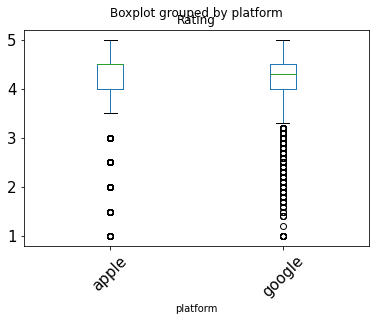

In [27]:
# Call the boxplot() method on our df.
# Set the parameters: by = 'platform' and column = ['Rating'].
df.boxplot(by='platform', column ='Rating', grid=False, rot=45, fontsize=15)